# The Quench Experiments

Starting from the state $\ket{Z_i}$ we first evolve with a $P_0$ distribution over measurments for some number of full steps (in ubits of system size) and then switch to the probed distribution $P_1$.

The measurements done will be:
1. Topological Entanglement Entropy
2. Topological Entanglement Negativity

In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("AdditionalStructure/NewTypes.jl")
include("AdditionalStructure/BitStringOps.jl")
include("AdditionalStructure/Measurements.jl")
include("AdditionalStructure/MICModels.jl")
include("AdditionalStructure/ModelRuns.jl")
include("AdditionalStructure/Iterators.jl");

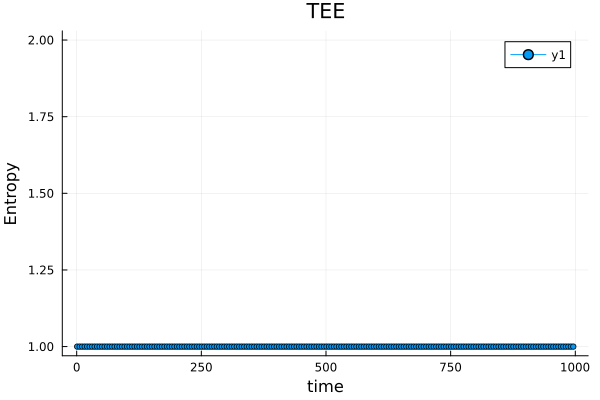

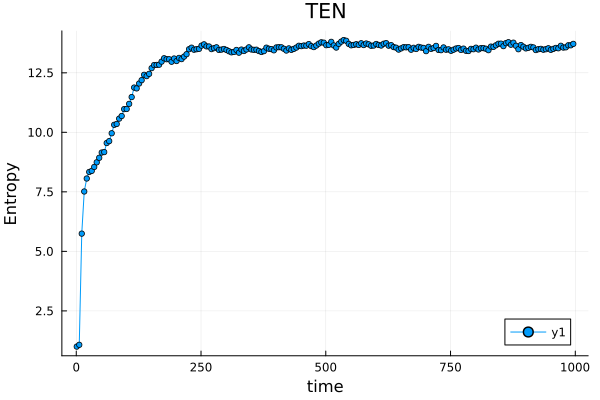

[1.0 1.075 5.745 7.515 8.06 8.335 8.38 8.545 8.74 8.93 9.15 9.17 9.55 9.63 9.96 10.315 10.35 10.575 10.685 10.975 10.98 11.195 11.48 11.88 11.845 12.05 12.19 12.415 12.36 12.455 12.695 12.825 12.83 12.84 12.97 13.11 13.07 13.07 12.965 13.1 12.995 13.125 13.075 13.18 13.28 13.49 13.555 13.47 13.49 13.505 13.64 13.695 13.61 13.605 13.495 13.535 13.57 13.46 13.475 13.5 13.46 13.405 13.36 13.375 13.46 13.345 13.475 13.415 13.48 13.57 13.48 13.465 13.47 13.415 13.375 13.41 13.555 13.51 13.495 13.445 13.565 13.575 13.57 13.51 13.435 13.525 13.465 13.505 13.56 13.635 13.62 13.645 13.64 13.705 13.62 13.58 13.645 13.725 13.78 13.765 13.66 13.675 13.8 13.65 13.56 13.715 13.81 13.875 13.845 13.715 13.655 13.67 13.7 13.67 13.74 13.665 13.73 13.695 13.635 13.645 13.71 13.67 13.645 13.72 13.745 13.64 13.66 13.58 13.555 13.475 13.525 13.575 13.57 13.575 13.47 13.55 13.5 13.59 13.56 13.545 13.41 13.59 13.505 13.54 13.63 13.46 13.45 13.565 13.47 13.485 13.425 13.47 13.52 13.54 13.46 13.515 13.425 13.41

In [2]:
# Toric Code 

stab_distro_intial = Categorical([1/2, 1/2, 0, 0, 0, 0, 0, 0]) 
# Probability Distros over Stabiliser used to define the TC anyon Profileration. Very TC specific!
p_b = 0 # Boson Measurement
p_f = 0.1 # Fermion Measurement
stab_distro_probed = Categorical([(1-p_b-p_f)/2, (1-p_b-p_f)/2, p_b/2, p_b/2, 0, 0, p_f/2, p_f/2])

subsystem = 4
system = Init_EdgeSquareLattice(subsystem)

anneal_steps = 10
quench_steps = 1000 # Sample this lineraly (upgrade to log sampling if needed)
number_of_samples = 200
steps_per_sample = Int(quench_steps/number_of_samples)
sample_times = 1:steps_per_sample:quench_steps
number_of_runs = 100
TEEs = zeros(number_of_runs, number_of_samples)
TENs = zeros(number_of_runs, number_of_samples)

Threads.@threads for i_run = 1:number_of_runs
    state = MixedDestabilizer(Stabilizer(zeros(UInt8, system.nbits), 
                                        zeros(Bool, system.nbits, system.nbits), 
                                        Matrix(LinearAlgebra.I, system.nbits, system.nbits)))
    iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro_intial), anneal_steps)
    # Annealing the Z state to a TC logic state
    for i_sample = 1:number_of_samples
        state_in = deepcopy(state)
        TEEs[i_run, i_sample] = entanglement_entropy_topo(state_in, system)
        TENs[i_run, i_sample] = entanglement_negativity(state, system)
        iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro_probed), steps_per_sample)
    end
end

TENs = sum(TENs, dims=1)/number_of_runs
TEEs = sum(TEEs, dims=1)/number_of_runs

# plot entropy as function of time
p = plot(sample_times, TEEs',
    title="TEE",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3))
q = plot(sample_times, TENs',
    title="TEN",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3))
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
display(q)
print(TENs)
print(TEEs)


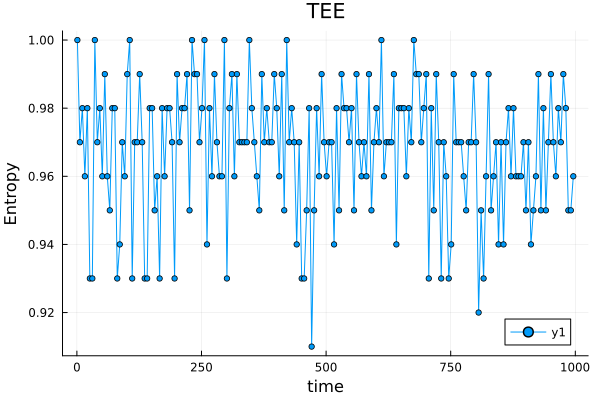

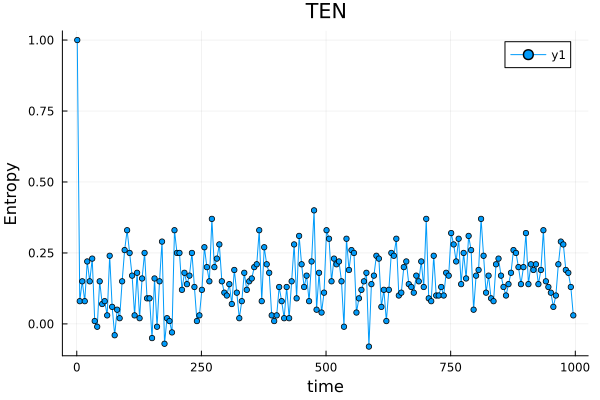

[1.0 0.08 0.15 0.08 0.22 0.15 0.23 0.01 -0.01 0.15 0.07 0.08 0.03 0.24 0.06 -0.04 0.05 0.02 0.15 0.26 0.33 0.25 0.17 0.03 0.18 0.02 0.16 0.25 0.09 0.09 -0.05 0.16 -0.01 0.15 0.29 -0.07 0.02 0.01 -0.03 0.33 0.25 0.25 0.12 0.18 0.14 0.17 0.25 0.13 0.01 0.03 0.12 0.27 0.2 0.15 0.37 0.2 0.23 0.28 0.15 0.11 0.1 0.14 0.07 0.19 0.11 0.02 0.08 0.18 0.12 0.15 0.16 0.2 0.21 0.33 0.08 0.27 0.21 0.18 0.03 0.01 0.03 0.13 0.08 0.02 0.13 0.02 0.15 0.28 0.09 0.31 0.21 0.13 0.17 0.08 0.22 0.4 0.05 0.18 0.04 0.11 0.33 0.3 0.15 0.23 0.21 0.22 0.15 -0.01 0.3 0.19 0.26 0.25 0.04 0.09 0.12 0.15 0.18 -0.08 0.14 0.17 0.24 0.23 0.06 0.12 0.01 0.12 0.25 0.24 0.3 0.1 0.11 0.2 0.22 0.14 0.13 0.11 0.17 0.15 0.22 0.13 0.37 0.09 0.08 0.24 0.1 0.1 0.13 0.1 0.18 0.17 0.32 0.28 0.22 0.3 0.14 0.25 0.16 0.31 0.26 0.05 0.17 0.19 0.37 0.24 0.11 0.17 0.09 0.08 0.21 0.23 0.17 0.13 0.1 0.14 0.18 0.26 0.25 0.2 0.14 0.2 0.32 0.14 0.21 0.19 0.21 0.14 0.19 0.33 0.15 0.13 0.11 0.06 0.1 0.21 0.29 0.28 0.19 0.18 0.13 0.03][1.0 0.97 

In [3]:
# Toric Code 

stab_distro_intial = Categorical([1/2, 1/2, 0, 0, 0, 0, 0, 0]) 
# Probability Distros over Stabiliser used to define the TC anyon Profileration. Very TC specific!
p_b = 0.1 # Boson Measurement
p_f = 0 # Fermion Measurement
stab_distro_probed = Categorical([(1-p_b-p_f)/2, (1-p_b-p_f)/2, p_b/2, p_b/2, 0, 0, p_f/2, p_f/2])

subsystem = 4
system = Init_EdgeSquareLattice(subsystem)

anneal_steps = 10
quench_steps = 1000 # Sample this lineraly (upgrade to log sampling if needed)
number_of_samples = 200
steps_per_sample = Int(quench_steps/number_of_samples)
sample_times = 1:steps_per_sample:quench_steps
number_of_runs = 100
TEEs = zeros(number_of_runs, number_of_samples)
TENs = zeros(number_of_runs, number_of_samples)

Threads.@threads for i_run = 1:number_of_runs
    state = MixedDestabilizer(Stabilizer(zeros(UInt8, system.nbits), 
                                        zeros(Bool, system.nbits, system.nbits), 
                                        Matrix(LinearAlgebra.I, system.nbits, system.nbits)))
    iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro_intial), anneal_steps)
    # Annealing the Z state to a TC logic state
    for i_sample = 1:number_of_samples
        state_in = deepcopy(state)
        TEEs[i_run, i_sample] = entanglement_entropy_topo(state_in, system)
        TENs[i_run, i_sample] = entanglement_negativity(state, system)
        iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro_probed), steps_per_sample)
    end
end

TENs = sum(TENs, dims=1)/number_of_runs
TEEs = sum(TEEs, dims=1)/number_of_runs

# plot entropy as function of time
p = plot(sample_times, TEEs',
    title="TEE",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3))
q = plot(sample_times, TENs',
    title="TEN",
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3))
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
display(q)
print(TENs)
print(TEEs)
